# Time Series Forecasting Analysis

**Purpose and Details** 

This automation is for Time series Forecasting analysis using AR and ARIMA model. Time series forecasting is useful for multiple domains/practices, especially for marketing and sales, stock prices, any products sales/revenues time periods. In this notebook I used the monthly insurance premium data, on each month total amount of premiums earned by an insurance company. 

The purpose of this notebook is to benefit Data Analysts/Data Scientists who wants to analyse the time series forecasting on their particular business purpose.  This is targeted on data set which contains duration of time period either by monthly, by weekly, by daily, by half-yearly, by yearly timelines as at least one feature; then this notebook will be useful for forecasting their business needs.

Business related to time events, the notebook shows how the business has an impact over the period of time and what are all other features dependent on particular sales or marketing scopes. It provides insights of trending patterns, seasonality patterns from the plot graphs, and how the sequence of time line changes the business values.

**How ARIMA is useful than Auto-Regressive model**
1. This ARIMA model is more useful in fitting non stationary time series data.
2. I in ARIMA will take the differences and hence achieves the stationarity
3. Where as in Auto-Regressive model even stationary time series cannot be used in low order data.

**Here, taken sample csv called Insurance premiums csv file which contains two features: 1. Month 2. Total Premium**
 Majorly it has the following steps 
 1. Importing dataset and converting into timeseries dataset
 2. Analysising the present dataset and when needed transforming into differencing by plotting the graph
 3. AutoRegression model
 4. ARIMA model

**Dataset details**: Created Insurance_premiums_newdata.csv on my own; 
Features contains month and total premium; These two features can be changed. There is output csv, only input csv "Insurance_premiums_newdata.csv" is used. 

**Edit Date** : 06-25-2019

**Current Version** : 1.0

**Future plan** : Time series Forecasting with Deep Learning Neural networks, version 2.0   

Current package requirements include:
* Pandas
* statsmodels
* Matplotlib


##### __1. Importing dataset and converting into timeseries dataset__

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings
warnings.filterwarnings('ignore')

C:\Users\kkanniappa001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def datetime_parser(dateVal):
    return datetime.strptime(dateVal,'%Y-%m')

###### Understanding the attibutes:  
index_col attribute for defining which column timeseries considered <br/>
parse_dates attribute for appending date value<br/>
date_parser attribute passing function of datetime_parser<br/>

In [3]:
timeseries_df = pd.read_csv("Insurance_premiums_newdata.csv",index_col=0, parse_dates=[0],
                            date_parser=datetime_parser)

In [4]:
timeseries_df.head()

Total Premiums ($)
Month                         
2016-01-01               26600
2016-02-01               14600
2016-03-01               18300
2016-04-01               11900
2016-05-01               18000

In [5]:
timeseries_df.sample(5)

Total Premiums ($)
Month                         
2017-09-01               29000
2018-11-01               52000
2017-08-01               30400
2017-11-01               26500
2018-04-01               43900

###### __Insights:__
1. Month column become index column of timeseries dataframe <br/>
2. datetime_parser function appended the date value along with year and month

In [6]:
timeseries_df.columns

Index(['Total Premiums ($)'], dtype='object')

In [7]:
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Total Premiums ($)    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [8]:
timeseries_df.describe().transpose()

count     mean           std      min      25%      50%  \
Total Premiums ($)   36.0  29575.0  11781.908043  11900.0  19250.0  28000.0   

                        75%      max  
Total Premiums ($)  40275.0  52000.0

#####  __2.  Analysising the present dataset and when needed transforming into differencing by plotting the graph__

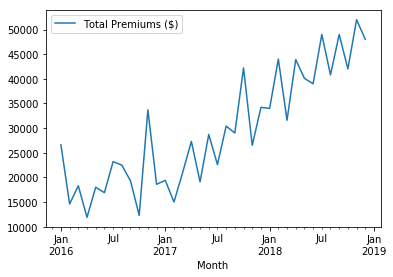

In [9]:
timeseries_df.plot()

##### __Insights :__
1. from this plotted image it shows trending type of graph <br/>
2. Best graph for time series is Average type of graph <br/>
3. It is nothing but trying to make the model is stationarity <br/>
4. In order to achieve "Stationarity", mean, varience and covariance is constant over the period of time.<br/>
5. For Achieving Stationarity, we need to apply differencing or Integrated order of 1 denoted by I(1), and in generally I(d).

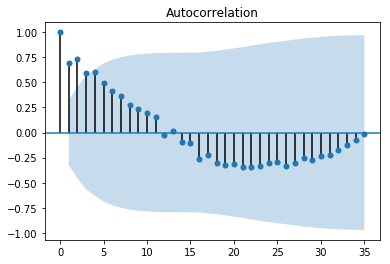

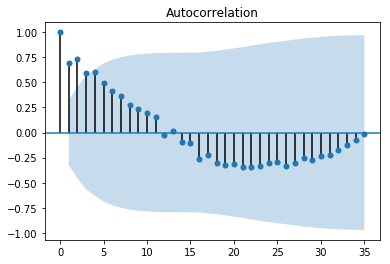

In [10]:
plot_acf(timeseries_df)

##### __Now convert to stationary__ 

In [11]:
timeseries_df.head(5)

Total Premiums ($)
Month                         
2016-01-01               26600
2016-02-01               14600
2016-03-01               18300
2016-04-01               11900
2016-05-01               18000

**Differencing / Integrated order of 1 / I(1)**

In [12]:
timeseries_diff = timeseries_df.diff(periods=1)

In [13]:
timeseries_diff.head(5)

Total Premiums ($)
Month                         
2016-01-01                 NaN
2016-02-01            -12000.0
2016-03-01              3700.0
2016-04-01             -6400.0
2016-05-01              6100.0

In [14]:
timeseries_diff = timeseries_diff[1:]
timeseries_diff.head()

Total Premiums ($)
Month                         
2016-02-01            -12000.0
2016-03-01              3700.0
2016-04-01             -6400.0
2016-05-01              6100.0
2016-06-01             -1100.0

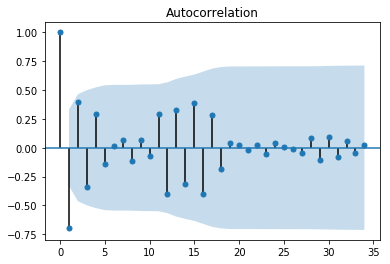

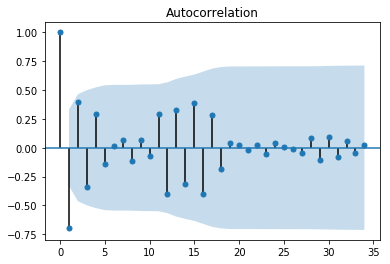

In [15]:
plot_acf(timeseries_diff)

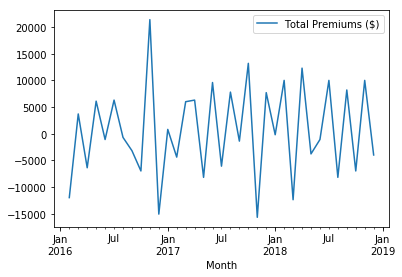

In [16]:
timeseries_diff.plot()

##### __Insights :__
1. From plot_acf the timeseries differencing shows immediate drop of instances
where as it is before slow drop of each instances, it is good model for time series <br/>
2. After plotting timeseries difference it clearly shows that the model has significant
on "Stationarity" which means mean, varience and covarience are almost constant in time. 

#### __3. AutoRegression Model__

In [17]:
X = timeseries_df.values
X = X.astype('float32')

In [18]:
train = X[0:27]

In [19]:
train.shape

(27, 1)

In [20]:
test = X[27:]

In [21]:
test.shape

(9, 1)

In [22]:
ar_model = AR(train)

In [23]:
ar_model_fit = ar_model.fit()

In [24]:
predictions = []

In [25]:
predictions = ar_model_fit.predict(start=26,end=36)

In [26]:
test

array([[43900.],
       [40100.],
       [39000.],
       [49000.],
       [40800.],
       [49000.],
       [42000.],
       [52000.],
       [48000.]], dtype=float32)

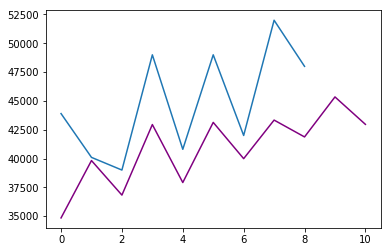

In [27]:
plt.plot(test)
plt.plot(predictions,color='purple')

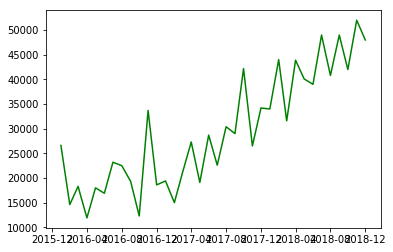

In [28]:
# checking with initial plot 
plt.plot(timeseries_df, color = 'green')

#### __4.ARIMA model__

##### ARIMA model is nothing but combination of three models
1. AR -> AutoRegression (p) <br/>
2. I  -> Integrated, which is stationary (d) <br/>
3. MA -> Moving Average model (q) <br/>
based minimum AIC value then the timeseries model is best suitable one among different 
combination p, d, q values; <br/>
here provide different set of p, d, q values, and check minimum aic value

In [29]:
arima_model = ARIMA(train,order=(9,2,0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.aic)

527.4204932791218


In [30]:
predictions = arima_model_fit.forecast(steps=10)[0]

In [31]:
predictions

array([39604.22154019, 35595.06734187, 41309.02669406, 37450.67319659,
       44693.51960291, 37862.92390956, 40636.22669136, 41137.94729653,
       47588.13288345, 41538.50464657])

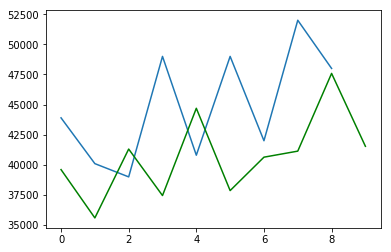

In [32]:
plt.plot(test)
plt.plot(predictions,color='green')

##### Insights
 - From the above diagram shows the prediction values of ARIMA model in accordance with model fit of AIC value; 
When user can changes the p, d q values, aic and predictions will also change;     